# 2018 LendingClub Loan Data
# Data Preparation for Building ML Models

In [1]:
%matplotlib inline
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import modules.global_plot_functions as gp 
sns.set()

# columns to be excluded in the prediction
cols_excluded = ['issue_d', 'title', 'earliest_cr_line', 'total_pymnt', 'last_pymnt_d', 'roi', 'out_prncp',
                 'home_ownership', 'application_type', 'emp_length', 'grade']

In [2]:
# load data
df = pd.read_pickle('out/2018_LC_Loans_Cleaned.pkl')
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status_flag,roi,months_in_loan
0,3000.0,36 months,0.0734,93.10,A,9 years,RENT,52000.0,2018-03-01,Major purchase,...,0.0,0.0,0.0,191216.0,141.0,30500.0,0.0,Fully Paid,11.577285,2.0
1,5000.0,36 months,0.1198,166.03,B,10+ years,OWN,55000.0,2018-03-01,Other,...,33.3,1.0,0.0,61551.0,28880.0,22000.0,27751.0,Fully Paid,13.306667,1.0
2,7000.0,36 months,0.1198,232.44,B,< 1 year,MORTGAGE,40000.0,2018-03-01,Home improvement,...,33.3,0.0,0.0,132817.0,131726.0,10000.0,118917.0,Fully Paid,693.314943,12.0
3,10000.0,36 months,0.1090,326.92,B,< 1 year,RENT,52320.0,2018-03-01,Debt consolidation,...,0.0,1.0,0.0,72124.0,74220.0,2300.0,67724.0,Fully Paid,1036.679274,13.0
4,28000.0,36 months,0.1090,915.36,B,6 years,MORTGAGE,103000.0,2018-03-01,Debt consolidation,...,11.1,0.0,0.0,153679.0,76475.0,80300.0,73379.0,Fully Paid,2922.184697,14.0


In [3]:
# extract columns to be included in the prediction
# create dummy variable for loan_status_flag
df_clean = pd.get_dummies(df[list(set(df.columns) - set(cols_excluded))], columns=['loan_status_flag'])
df_clean.drop('loan_status_flag_Fully Paid', axis=1, inplace=True)

# rename column 
df_clean.rename(columns={"loan_status_flag_Default": "default"}, inplace=True)

# get numeric value for term
df_clean['term'] = df_clean['term'].apply(lambda x: int(re.findall(r'\d+', x)[0]))

# drop rows with nan in months_in_loan
df_clean_dropna = df_clean.dropna(axis=0)

df_clean.head()

,revol_util,num_op_rev_tl,il_util,inq_last_12m,open_rv_24m,delinq_amnt,mo_sin_rcnt_rev_tl_op,mort_acc,tot_cur_bal,total_bc_limit,...,mths_since_rcnt_il,tot_hi_cred_lim,num_accts_ever_120_pd,pub_rec,avg_cur_bal,num_actv_bc_tl,mths_since_recent_bc,bc_open_to_buy,installment,default
0,0.005,6.0,74.0,2.0,1.0,0.0,18.0,4.0,150592.0,30500.0,...,7.0,191216.0,0.0,0.0,25099.0,1.0,18.0,30359.0,93.10,0
1,0.339,13.0,63.0,1.0,2.0,0.0,3.0,0.0,28880.0,22000.0,...,33.0,61551.0,1.0,1.0,2222.0,3.0,3.0,10551.0,166.03,0
2,0.360,7.0,102.0,4.0,2.0,0.0,1.0,0.0,131726.0,10000.0,...,16.0,132817.0,3.0,0.0,10977.0,2.0,10.0,4996.0,232.44,0
3,0.385,3.0,113.0,4.0,1.0,0.0,7.0,0.0,74220.0,2300.0,...,7.0,72124.0,0.0,1.0,12370.0,1.0,45.0,608.0,326.92,0
4,0.265,9.0,91.0,0.0,3.0,0.0,2.0,1.0,76475.0,80300.0,...,4.0,153679.0,1.0,0.0,6373.0,4.0,2.0,59034.0,915.36,0


In [4]:
df_clean.shape

(93853, 69)

## Stratified Sampling of Train & Test Data

In [5]:
from sklearn.model_selection import train_test_split

X = df_clean_dropna[set(df_clean_dropna.columns) - set(['default'])]
y = df_clean_dropna['default']

# Split dataset into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y)

# save to pickle file
X_train.to_pickle('out/X_train.pkl')
X_test.to_pickle('out/X_test.pkl')
y_train.to_pickle('out/y_train.pkl')
y_test.to_pickle('out/y_test.pkl')

## Data Distribution of Train vs. Test

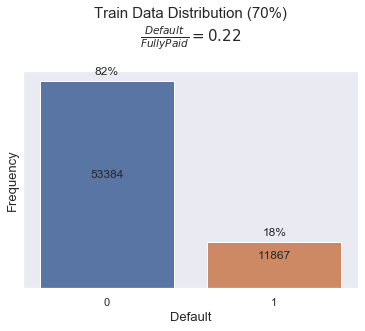

In [6]:
proportion = round(len(y_train[y_train==1]) / len(y_train[y_train==0]),2)

fig, ax = plt.subplots()
sns.countplot(y_train, ax=ax)
gp.annotate_plot2(ax, len(y_train))

plt.yticks([])
plt.ylabel('Frequency', size=13)
plt.xlabel('Default', size=13)
plt.title('Train Data Distribution (70%)\n' + r'$\frac{Default}{FullyPaid}=' + str(proportion) + '$\n', size=15)
plt.show()

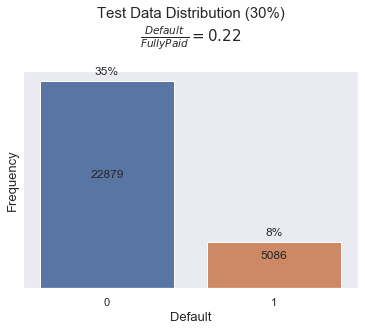

In [7]:
proportion = round(len(y_test[y_test==1]) / len(y_test[y_test==0]),2)

fig, ax = plt.subplots()
sns.countplot(y_test, ax=ax)
gp.annotate_plot2(ax, len(y_train))

plt.yticks([])
plt.ylabel('Frequency', size=13)
plt.xlabel('Default', size=13)
plt.title('Test Data Distribution (30%)\n' + r'$\frac{Default}{FullyPaid}=' + str(proportion) + '$\n', size=15)
plt.show()